In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

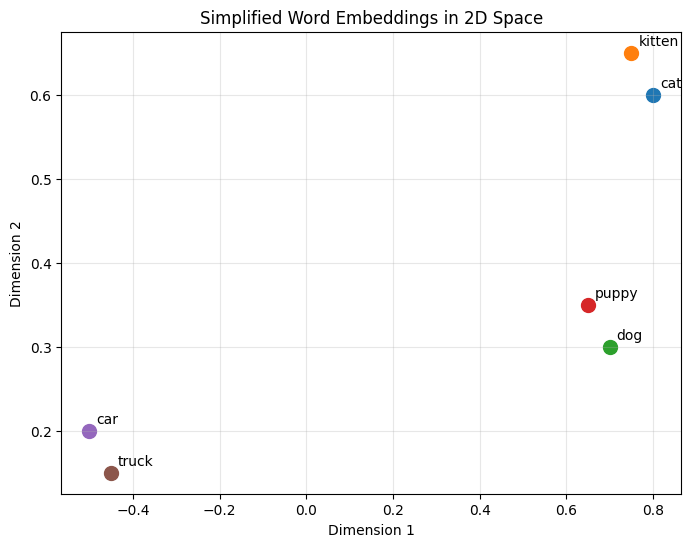

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.show()

To know how similar those are we use 
## Cosine Similarity 



In [2]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)



In [6]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity=cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


## Embedding Model Creation

In [3]:
from langchain_huggingface import HuggingFaceEmbeddings

# Intializing a simple Hugging face model without any api key
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/multi-qa-MiniLM-L6-cos-v1"
)
embeddings

/Users/maruthienugula/RAG_learnings/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/multi-qa-MiniLM-L6-cos-v1', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [4]:
# Embedding creation
text = "Reinforcement learning is a great field of research and development and is active"
embedding = embeddings.embed_query(text)

print("length : ",len(embedding))
print(embedding)

length :  384
[-0.035830751061439514, -0.05653940141201019, -0.07937175035476685, -0.055434174835681915, 0.03983181342482567, 0.13044004142284393, -0.010156454518437386, 0.025156177580356598, -0.010735648684203625, 0.04628074914216995, 0.018154310062527657, 0.08843852579593658, 0.05984964221715927, 0.07148883491754532, 0.03234248608350754, 0.06916797161102295, -0.026660460978746414, 0.027906659990549088, 0.008988311514258385, -0.09822703897953033, -0.09511099010705948, -0.05808812379837036, 0.034517351537942886, -0.014104713685810566, -0.08212262392044067, 0.026796691119670868, -0.030906226485967636, -0.07606998085975647, 0.0003144904621876776, 0.007949630729854107, 0.019368598237633705, -0.0460953414440155, 0.07424482703208923, -0.01371748372912407, -0.09590095281600952, 0.10034263879060745, -0.08205264061689377, -0.02310999669134617, -0.005261236801743507, -0.003887879429385066, -0.0054075527004897594, -0.0804288238286972, -0.018679579719901085, -0.05265357345342636, 0.04654343426227

In [7]:
sentences = [
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[2])
print(embedding_sentence[3])

[-0.05871664360165596, -0.026865210384130478, -0.0665871798992157, 0.03276467323303223, -0.06041749566793442, -0.05019475892186165, 0.007337714545428753, 0.09776951372623444, -0.006220622919499874, 0.0463915653526783, -0.06473080068826675, 0.0441109724342823, 0.0329231359064579, 0.02108275704085827, 0.01731017418205738, -0.038429610431194305, -0.010108045302331448, -0.03200281783938408, 0.06447696685791016, -0.10119324922561646, -0.09071352332830429, 0.00046212354209274054, -0.01725812815129757, 0.030336841940879822, 0.03460655361413956, 0.018703021109104156, 0.01774325594305992, -0.004823992028832436, -0.045287903398275375, 0.0028273772913962603, -0.012637588195502758, 0.039326757192611694, 0.08221663534641266, -0.020283618941903114, -0.010702041909098625, 0.07005494087934494, 0.0015486583579331636, -0.049374453723430634, -0.040955957025289536, -0.03923076018691063, -0.019071437418460846, -0.005455540958791971, -0.019804615527391434, -0.005256085656583309, 0.07320655137300491, 0.02279

In [6]:
cosine_similarity(embedding_sentence[2],embedding_sentence[3])

np.float64(0.8654638617173785)

## Some popular Embedding models on huggingface

In [14]:
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

In [13]:
for i in range(len(sentences)):
    for j in range(i+1,len(sentences)):
        similarity = cosine_similarity(embedding_sentence[i],embedding_sentence[j])
        print(sentences[i]," vs ",sentences[j])
        print(similarity)

The cat sat on the mat  vs  The dog played in the yard
0.29894351238861977
The cat sat on the mat  vs  I love programming in Python
0.12300139494376122
The cat sat on the mat  vs  Python is my favorite programming language
0.12723208519643292
The dog played in the yard  vs  I love programming in Python
0.11927355818123293
The dog played in the yard  vs  Python is my favorite programming language
0.10092097374986163
I love programming in Python  vs  Python is my favorite programming language
0.8654638617173785


In [14]:
# Example- Semantic Search- Retireve the similar sentence
# Test semantic search
documents = [
    "LangChain is a framework for developing applications powered by language models",
    "Python is a high-level programming language",
    "Machine learning is a subset of artificial intelligence",
    "Embeddings convert text into numerical vectors",
    "The weather today is sunny and warm",
    "Reinforcement learning is a way of teaching machines to make decisions by letting them learn from experience rather than instructions."
]
query="What is Reinforcement Learning?"

In [ ]:
def semantic_search(query,documents,embeddings=embeddings,top_k=3):
    doc_embeds = embeddings.embed_documents(documents)
    query_embed = embeddings.embed_query(query)

    similarities = []
    for i,embed in enumerate(doc_embeds):
        sim = cosine_similarity(embed,query_embed)
        similarities.append((sim,documents[i]))
    
    similarities.sort(reverse=True)
    return similarities[:top_k]


In [16]:
semantic_search(query,documents,embeddings)

[(np.float64(0.8462981321312869),
  'Reinforcement learning is a way of teaching machines to make decisions by letting them learn from experience rather than instructions.'),
 (np.float64(0.3624920211482914),
  'Machine learning is a subset of artificial intelligence'),
 (np.float64(0.22035782581951227),
  'Python is a high-level programming language')]